# 1. Import Library

In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

# 資料準備

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [7]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

# 3. Create Model 

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

# 4. Train model

In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)




Train on 930 samples, validate on 104 samples
Epoch 1/30





 - 1s - loss: 0.6901 - acc: 0.5774 - val_loss: 0.6707 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6675 - acc: 0.5957 - val_loss: 0.5894 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6094 - acc: 0.6677 - val_loss: 0.4939 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5458 - acc: 0.7624 - val_loss: 0.4620 - val_acc: 0.7596
Epoch 5/30
 - 0s - loss: 0.5073 - acc: 0.7602 - val_loss: 0.4544 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4918 - acc: 0.7667 - val_loss: 0.4402 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4831 - acc: 0.7591 - val_loss: 0.4428 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4797 - acc: 0.7570 - val_loss: 0.4356 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4740 - acc: 0.7634 - val_loss: 0.4280 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4706 - acc: 0.7763 - val_loss: 0.4257 - val_acc: 0.7981
Epoch 11/30
 - 0s - loss: 0.4666 - acc: 0.7624 - val_loss: 0.4230 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.464

# 6. Print History

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

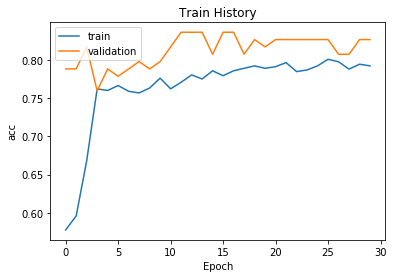

In [16]:
show_train_history(train_history,'acc','val_acc')

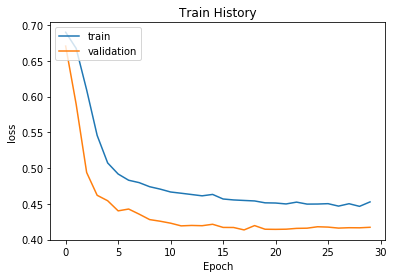

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 29us/step


In [31]:
scores

[0.43863083666021174, 0.8109090913425793]

# 預測資料

# 加入Jack & Rose資料

In [20]:
"""
Jack = ([0 ,'Jack',3, 'male'  , 23, 1, 0,  5.0000,'S'])
Rose = ([1 ,'Rose',1, 'female', 20, 1, 0, 100.0000,'S'])
"""
Jack={'survived':0, 'name':'Jack','pclass':3, 'sex':'male', 
                   'age':23, 'sibsp':1,'parch':0, 'fare':5.0000,'embarked':'S'}
Rose={'survived':1, 'name':'Rose','pclass':1, 'sex':'female', 
                   'age':20, 'sibsp':1,'parch':0, 'fare':100.0000,'embarked':'S'}


In [21]:
JR_df = pd.DataFrame.from_dict([Jack,Rose])
JR_df

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23,1,0,5.0,S
1,1,Rose,1,female,20,1,0,100.0,S


In [22]:
all_df=pd.concat([all_df,JR_df])

In [23]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


# 進行預測

In [24]:
all_Features,Label=PreprocessData(all_df)

In [25]:
all_probability=model.predict(all_Features)

In [26]:
all_probability[:10]

array([[0.97662807],
       [0.6275393 ],
       [0.97242427],
       [0.42048994],
       [0.9714425 ],
       [0.27288598],
       [0.94868934],
       [0.32778466],
       [0.94766724],
       [0.28333944]], dtype=float32)

In [27]:
pd=all_df
pd.insert(len(all_df.columns),
          'probability',all_probability)

# 預測Jack & Rose資料的生存機率

In [28]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.150977
1,1,Rose,1,female,20.0,1,0,100.0,S,0.970039


# 查看生存機率高，卻沒有存活

In [29]:
pd[(pd['survived']==0) &  (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972424
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971443
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.976950
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.974814
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.960834


In [30]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976628
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.627539
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972424
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.420490
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971443
